<a href="https://colab.research.google.com/github/yooje153/-/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%86%8D_%EB%B3%B4%EB%AC%BC%EC%B0%BE%EA%B8%B0_%ED%8C%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 전처리 하기

In [158]:
#먼저 필요한 모듈을 import해줍니다

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
# 시각화 과정에서 한글 깨짐 방지!!!!

from matplotlib import font_manager, rc
import matplotlib
import platform
import matplotlib.pyplot as plt

%matplotlib inline 

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font',family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [88]:
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [89]:
path = "/content/drive/MyDrive/"

In [84]:
# 데이터프레임은 월별로 시트가 여러개이므로, csv 파일로 불러오는 것이 불가능하여, 리스트에 요소별로 데이터프레임을 추가하고, concat하는 방식으로 하였습니다.
df = []
for i in range(9):
    df.append(pd.read_excel(path+'BDAA_1회 내부 공모전 데이터.xlsx', sheet_name=i))

In [90]:
df = pd.concat([df[i] for i in range(9)], axis = 0)

In [91]:
df.head()

,주문접수일시,주문번호,유입매체,주문구분,유입채널,회원구분,아이디,전시유입코드,상품주문번호,유형,...,주문판매유형,상품유형,브랜드,판매가,수량,표준카테고리,모델번호,롯데맴버스오프라인고객번호,롯데맴버스온라인고객번호,회원번호
0,2022-01-31 23:59:43,2022013116206973,MO WEB,일반주문,디폴트 채널상세,LPOINT통합회원,alls****,NaN,2022013116206973_1,주문,...,일반판매상품,일반판매_일반상품,씨제이제일제당,24900,1,냉장/냉동/간편식 > 떡볶이/만두 > 만두,NaN,NaN,NaN,NaN
1,2022-01-31 23:44:09,2022013116204996,MO WEB,일반주문,디폴트 채널상세,LPOINT통합회원,okok****,CHT,2022013116204996_1,주문,...,일반판매상품,일반판매_일반상품,씨제이제일제당,26050,1,가공식품 > 장류 > 고추장/초고추장,NaN,NaN,NaN,NaN
2,2022-01-31 23:44:09,2022013116204996,MO WEB,일반주문,디폴트 채널상세,LPOINT통합회원,okok****,CHT,2022013116204996_2,주문,...,일반판매상품,일반판매_일반상품,씨제이제일제당,22620,1,냉장/냉동/간편식 > 떡볶이/만두 > 만두,NaN,NaN,NaN,NaN
3,2022-01-31 23:35:27,2022013116204259,APP,일반주문,디폴트 채널상세,LPOINT통합회원,fire****,SCH스팸,2022013116204259_1,주문,...,일반판매상품,일반판매_일반상품,씨제이제일제당,40000,1,가공식품 > 통조림/캔 > 햄통조림,NaN,NaN,NaN,NaN
4,2022-01-31 23:21:06,2022013116202890,APP,일반주문,디폴트 채널상세,LPOINT통합회원,dkfm****,SCH비비고국,2022013116202890_1,주문,...,일반판매상품,일반판매_일반상품,씨제이제일제당,22030,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,NaN,NaN,NaN,NaN


In [92]:
#날짜 중 '일'이 역순으로 되어 있어 순서대로 정렬하였습니다.
df = df.sort_values('주문접수일시')
df

,주문접수일시,주문번호,유입매체,주문구분,유입채널,회원구분,아이디,전시유입코드,상품주문번호,유형,...,주문판매유형,상품유형,브랜드,판매가,수량,표준카테고리,모델번호,롯데맴버스오프라인고객번호,롯데맴버스온라인고객번호,회원번호
3266,2022-01-01 00:17:11,2022010111864975,MO WEB,일반주문,디폴트 채널상세,LPOINT통합회원,jsda****,SCH비비고갈비탕,2022010111864975_1,취소(주문취소),...,일반판매상품,일반판매_일반상품,씨제이제일제당,18830,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,NaN,NaN,NaN,NaN
3265,2022-01-01 00:38:13,2022010111866837,MO WEB,일반주문,[다음카카오] PCS 가격비교_롯데ON,LPOINT통합회원,kim6****,CHT,2022010111866837_1,주문,...,일반판매상품,일반판매_일반상품,씨제이제일제당,16240,1,가공식품 > 장류 > 된장/쌈장/청국장,NaN,NaN,NaN,NaN
3264,2022-01-01 00:38:42,2022010111866938,APP,일반주문,디폴트 채널상세,LPOINT통합회원,ggg9****,SCH쁘띠첼복숭아,2022010111866938_5,취소(주문취소),...,일반판매상품,일반판매_일반상품,씨제이제일제당,22300,1,과자/간식 > 디저트/케이크 > 푸딩,NaN,NaN,NaN,NaN
3263,2022-01-01 02:54:53,2022010111873735,APP,일반주문,디폴트 채널상세,LPOINT통합회원,savi****,RSI,2022010111873735_1,주문,...,일반판매상품,일반판매_일반상품,씨제이제일제당,33240,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,NaN,NaN,NaN,NaN
3262,2022-01-01 02:56:35,2022010111873774,APP,일반주문,디폴트 채널상세,LPOINT통합회원,savi****,RSI,2022010111873774_1,주문,...,일반판매상품,일반판매_일반상품,씨제이제일제당,33240,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-09-30 23:52:25,2022093018638708,MO WEB,일반주문,[네이버] PCS 가격비교_롯데ON,LPOINT통합회원,cha2844,CHT,2022093018638708_1,주문,...,일반판매상품,일반판매_일반상품,CJ제일제당,17400,1,가공식품 > 통조림/캔 > 닭가슴살통조림,NaN,NaN,NaN,1.000739e+10
3,2022-09-30 23:52:41,2022093018638709,APP,일반주문,디폴트 채널상세,LPOINT통합회원,wocns2,CHT,2022093018638709_1,주문,...,일반판매상품,일반판매_일반상품,CJ제일제당,24500,2,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,NaN,NaN,NaN,1.001256e+10
2,2022-09-30 23:56:28,2022093018639349,APP,일반주문,디폴트 채널상세,LPOINT통합회원,xraydos,RSI,2022093018639349_1,주문,...,일반판매상품,일반판매_일반상품,CJ제일제당,37000,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,NaN,NaN,NaN,1.001334e+10
1,2022-09-30 23:58:52,2022093018639892,APP,일반주문,[링크프라이스] CPS_롯데온,LPOINT통합회원,badamit,NaN,2022093018639892_1,주문,...,일반판매상품,일반판매_일반상품,CJ제일제당,38000,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,NaN,NaN,NaN,1.001083e+10


## 1) 분석에 필요하지 않은 칼럼 삭제하기

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102077 entries, 3266 to 0
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   주문접수일시         102077 non-null  object 
 1   주문번호           102077 non-null  int64  
 2   유입매체           102077 non-null  object 
 3   주문구분           102077 non-null  object 
 4   유입채널           102077 non-null  object 
 5   회원구분           102077 non-null  object 
 6   아이디            98430 non-null   object 
 7   전시유입코드         89492 non-null   object 
 8   상품주문번호         102077 non-null  object 
 9   유형             102077 non-null  object 
 10  배송회수구분         102077 non-null  object 
 11  진행단계           102077 non-null  object 
 12  진행상태 (약식)      0 non-null       float64
 13  구매확정           102077 non-null  object 
 14  주문완료일시         101745 non-null  object 
 15  구매확정일시         93595 non-null   object 
 16  출고지시일          93528 non-null   object 
 17  예외처리구분         24 non-null     

In [94]:
df.isna().sum()

주문접수일시                0
주문번호                  0
유입매체                  0
주문구분                  0
유입채널                  0
회원구분                  0
아이디                3647
전시유입코드            12585
상품주문번호                0
유형                    0
배송회수구분                0
진행단계                  0
진행상태 (약식)        102077
구매확정                  0
주문완료일시              332
구매확정일시             8482
출고지시일              8549
예외처리구분           102053
상태처리일시                0
배송상품유형                0
배송처리유형                0
배송수단                  0
배송예약구분                0
배송회차             102077
전시상품명                 0
전시단품명                 0
판매자상품번호               0
판매자상품명                0
판매자단품번호               0
판매자단품명                0
추가옵션                  0
주문판매유형                0
상품유형                  0
브랜드                   1
판매가                   0
수량                    0
표준카테고리                0
모델번호             102077
롯데맴버스오프라인고객번호     66480
롯데맴버스온라인고객번호      66364
회원번호              62368
dtype: int64

- 엑셀 파일 분석 결과 '진행상태 (약식)', '배송회차', '모델번호'는 일절 쓰지 않는 칼럼(총 데이터가 102077개인데 na가 102077개),
- '롯데멤버스오프라인고객번호', '롯데맴버스온라인고객번호','회원번호'는 6~9월에만 사용했던 칼럼이기에,
- 이 변수들로는 1 ~ 9월의 주문 경향을 분석하기에는 다소 어려움이 있어, 칼럼을 삭제하도록 하겠습니다.
- '추가옵션'이라는 칼럼 또한 모든 값이 []라는 널 값이기에, 삭제하였습니다.

In [95]:
df = df.drop(['진행상태 (약식)', '모델번호', '롯데맴버스오프라인고객번호', '롯데맴버스온라인고객번호', '회원번호'], axis = 1)

- 칼럼이 너무 많아서, 단일 값이거나, 널값인 칼럼은 제거하도록 하겠습니다.

In [96]:
for i in range(len(df.columns)):
    print(df.columns[i], len(df[df.columns[i]].unique()))

주문접수일시 92771
주문번호 95036
유입매체 5
주문구분 2
유입채널 551
회원구분 5
아이디 53401
전시유입코드 3389
상품주문번호 102076
유형 4
배송회수구분 2
진행단계 6
구매확정 3
주문완료일시 92468
구매확정일시 38160
출고지시일 278
예외처리구분 4
상태처리일시 284
배송상품유형 1
배송처리유형 1
배송수단 1
배송예약구분 1
배송회차 1
전시상품명 2188
전시단품명 489
판매자상품번호 1662
판매자상품명 2185
판매자단품번호 2096
판매자단품명 489
추가옵션 1
주문판매유형 1
상품유형 1
브랜드 3
판매가 1651
수량 37
표준카테고리 65


In [97]:
print(df['배송수단'].unique())
print(df['배송상품유형'].unique())
print(df['배송처리유형'].unique())
print(df['배송예약구분'].unique())
print(df['배송회차'].unique())
print(df['추가옵션'].unique())
print(df['주문판매유형'].unique())
print(df['상품유형'].unique())

['일반택배']
['일반상품']
['업체배송']
['일반배송']
[nan]
['[]']
['일반판매상품']
['일반판매_일반상품']


In [98]:
# 브랜드명의 경우 전부 값이 씨제이 제일제당으로 같으므로 제거해주겠습니다.
df['브랜드'].value_counts()

씨제이제일제당    54154
CJ제일제당     47922
Name: 브랜드, dtype: int64

In [99]:
df = df.drop(['배송수단', '배송상품유형', '배송처리유형', '배송예약구분', '배송회차', '추가옵션', '주문판매유형', '상품유형', '브랜드'], axis=1)

In [100]:
# 불필요한 칼럼을 제거하고, 27개로 남긴 상태이다.
len(df.columns)

27

In [101]:
df['예외처리구분'].unique()

array([nan, '구매확정후취소', '미수령신고접수철회요청', '발송약정'], dtype=object)

In [102]:
df[df['예외처리구분'] == '발송약정']

,주문접수일시,주문번호,유입매체,주문구분,유입채널,회원구분,아이디,전시유입코드,상품주문번호,유형,...,상태처리일시,전시상품명,전시단품명,판매자상품번호,판매자상품명,판매자단품번호,판매자단품명,판매가,수량,표준카테고리
1044,2022-09-27 11:14:18,2022092718188481,APP,일반주문,디폴트 채널상세,LPOINT통합회원,sericup,MLT,2022092718188481_1,교환,...,2022-10-06,해찬들 우리쌀로만든태양초매운고추장2kg X 2개,단일상품,LO1880319013,해찬들 우리쌀로만든태양초매운고추장2kg X 2개,LO1880319013_1880319014,단일상품,25330,1,가공식품 > 장류 > 고추장/초고추장


In [103]:
print(df['유형'].unique())
print(df['구매확정'].unique())
print(df['예외처리구분'].unique())

['취소(주문취소)' '주문' '반품' '교환']
['구매미확정' '구매확정' '구매확정연장']
[nan '구매확정후취소' '미수령신고접수철회요청' '발송약정']


In [104]:
df[df['구매확정일시'].isna()]

,주문접수일시,주문번호,유입매체,주문구분,유입채널,회원구분,아이디,전시유입코드,상품주문번호,유형,...,상태처리일시,전시상품명,전시단품명,판매자상품번호,판매자상품명,판매자단품번호,판매자단품명,판매가,수량,표준카테고리
3266,2022-01-01 00:17:11,2022010111864975,MO WEB,일반주문,디폴트 채널상세,LPOINT통합회원,jsda****,SCH비비고갈비탕,2022010111864975_1,취소(주문취소),...,2022-01-03,CJ 비비고 갈비탕 400g x4,단일상품,LO1031678373,CJ 비비고 갈비탕 400g x4,LO1031678373_1031678374,단일상품,18830,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕
3264,2022-01-01 00:38:42,2022010111866938,APP,일반주문,디폴트 채널상세,LPOINT통합회원,ggg9****,SCH쁘띠첼복숭아,2022010111866938_5,취소(주문취소),...,2022-01-03,[CJ제일제당] 쁘띠첼 복숭아 90g*9번들X2EA,단일상품,LO1354545470,[CJ제일제당] 쁘띠첼 복숭아 90g*9번들X2EA,LO1354545470_1354545471,단일상품,22300,1,과자/간식 > 디저트/케이크 > 푸딩
3249,2022-01-01 17:16:48,2022010111935204,APP,일반주문,디폴트 채널상세,LPOINT통합회원,love****,SCH파래김,2022010111935204_1,취소(주문취소),...,2022-01-03,[CJ직배송]CJ 명가김 파래김 4G*16EA X 2개,단일상품,LO1511816458,[CJ직배송]CJ 명가김 파래김 4G*16EA X 2개,LO1511816458_1511816459,단일상품,6960,3,수산/건어물 > 김/해조류 > 조미김/도시락김
3228,2022-01-02 13:03:20,2022010212023381,MO WEB,일반주문,디폴트 채널상세,LPOINT통합회원,pilj****,BSGP2566,2022010212023381_2,취소(주문취소),...,2022-01-02,[특별이벤트] 햇반 BIG 컵반 스팸 2종 X 3개 + 주식선물,단일상품,LO1631718294,[특별이벤트] 햇반 BIG 컵반 스팸 2종 X 3개 + 주식선물,LO1631718294_1631718295,단일상품,19920,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
3227,2022-01-02 13:03:20,2022010212023381,MO WEB,일반주문,디폴트 채널상세,LPOINT통합회원,pilj****,BSGP2566,2022010212023381_1,취소(주문취소),...,2022-01-02,[특별이벤트]햇반 BIG 컵반 마요 2종 X 3개+주식선물,단일상품,LO1630046529,[특별이벤트]햇반 BIG 컵반 마요 2종 X 3개+주식선물,LO1630046529_1630046530,단일상품,19920,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,2022-09-30 22:49:16,2022093018630370,APP,일반주문,[링크프라이스] CPS_롯데온,LPOINT통합회원,pete****,NaN,2022093018630370_1,취소(주문취소),...,2022-09-30,[L포인트 3000p 증정]LAST DAY EVENT,비비고 사골곰탕 500g x18봉,LO1978869746,[L포인트 3000p 증정]★LAST DAY EVENT★,LO1978869746_1978869755,비비고 사골곰탕 500g x18봉,24500,2,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕
38,2022-09-30 22:56:31,2022093018631261,APP,일반주문,디폴트 채널상세,LPOINT통합회원,yeop****,NaN,2022093018631261_1,취소(주문취소),...,2022-10-04,비비고 사골곰탕 500g x18봉,단일상품,LO1032764663,비비고 사골곰탕 500g x18봉,LO1032764663_1032764664,단일상품,24600,2,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕
32,2022-09-30 23:02:38,2022093018631923,APP,일반주문,[링크프라이스] CPS_롯데온,LPOINT통합회원,tae0****,CHT,2022093018631923_1,취소(주문취소),...,2022-09-30,비비고 사골곰탕 500g x18봉,단일상품,LO1032764663,비비고 사골곰탕 500g x18봉,LO1032764663_1032764664,단일상품,24600,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕
30,2022-09-30 23:05:50,2022093018632420,APP,일반주문,디폴트 채널상세,LPOINT통합회원,dmsd****,RSI,2022093018632420_1,취소(주문취소),...,2022-10-03,비비고 사골곰탕 500g x18봉,단일상품,LO1032764663,비비고 사골곰탕 500g x18봉,LO1032764663_1032764664,단일상품,24600,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕


## 2)주문완료된 데이터만 추출하기

In [105]:
# 반품 및 교환 항목, 구매확정이 되지 않은 항목, 
# 예외처리구분(구매확정이 되었어도 이후 취소된 항목, 미수령되어 철회된 항목 등)은 제외하고, 
# 확실하게 주문이 성공된 상품에 대해서만 df_ordered라는 데이터프레임에 넣어주도록 하겠습니다.

df_ordered = df[df['유형'] == '주문']
df_ordered = df_ordered[df_ordered['구매확정'] == '구매확정']
df_ordered = df_ordered[df_ordered['예외처리구분'].isna()]

In [106]:
df_ordered

,주문접수일시,주문번호,유입매체,주문구분,유입채널,회원구분,아이디,전시유입코드,상품주문번호,유형,...,상태처리일시,전시상품명,전시단품명,판매자상품번호,판매자상품명,판매자단품번호,판매자단품명,판매가,수량,표준카테고리
3265,2022-01-01 00:38:13,2022010111866837,MO WEB,일반주문,[다음카카오] PCS 가격비교_롯데ON,LPOINT통합회원,kim6****,CHT,2022010111866837_1,주문,...,2022-01-03,CJ 다담 된장찌개양념 530G x3,단일상품,LO1135162715,CJ 다담 된장찌개양념 530G x3,LO1135162715_1135162716,단일상품,16240,1,가공식품 > 장류 > 된장/쌈장/청국장
3263,2022-01-01 02:54:53,2022010111873735,APP,일반주문,디폴트 채널상세,LPOINT통합회원,savi****,RSI,2022010111873735_1,주문,...,2022-01-06,비비고 국물요리 BEST 9종,단일상품,LO1495023715,비비고 국물요리 BEST 9종,LO1495023715_1495023716,단일상품,33240,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
3262,2022-01-01 02:56:35,2022010111873774,APP,일반주문,디폴트 채널상세,LPOINT통합회원,savi****,RSI,2022010111873774_1,주문,...,2022-01-06,비비고 국물요리 BEST 9종,단일상품,LO1495023715,비비고 국물요리 BEST 9종,LO1495023715_1495023716,단일상품,33240,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
3261,2022-01-01 04:35:17,2022010111875631,MO WEB,일반주문,[다음카카오] PCS 가격비교_롯데ON,LPOINT통합회원,happ****,CHT,2022010111875631_1,주문,...,2022-01-04,CJ 다담 된장찌개양념 530G X 4개,단일상품,LO1517718327,CJ 다담 된장찌개양념 530G X 4개,LO1517718327_1517718328,단일상품,21660,1,가공식품 > 장류 > 된장/쌈장/청국장
3260,2022-01-01 08:00:37,2022010111879668,APP,일반주문,디폴트 채널상세,LPOINT통합회원,cats****,SCH비비고추어탕,2022010111879668_2,주문,...,2022-01-04,비비고 추어탕 460Gx5개,단일상품,LO1249549902,비비고 남도식 추어탕 460Gx5개,LO1249549902_1249549903,단일상품,23680,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-09-30 23:52:25,2022093018638708,MO WEB,일반주문,[네이버] PCS 가격비교_롯데ON,LPOINT통합회원,cha2844,CHT,2022093018638708_1,주문,...,2022-10-06,[CJ직배송]더건강한 닭가슴살 직화 스테이크100G X 6개,단일상품,LO1520770627,[CJ직배송]더건강한 닭가슴살 직화 스테이크100G X 6개,LO1520770627_1520770628,단일상품,17400,1,가공식품 > 통조림/캔 > 닭가슴살통조림
3,2022-09-30 23:52:41,2022093018638709,APP,일반주문,디폴트 채널상세,LPOINT통합회원,wocns2,CHT,2022093018638709_1,주문,...,2022-10-06,[L포인트 3000p 증정]LAST DAY EVENT,비비고 사골곰탕 500g x18봉,LO1978869746,[L포인트 3000p 증정]★LAST DAY EVENT★,LO1978869746_1978869755,비비고 사골곰탕 500g x18봉,24500,2,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕
2,2022-09-30 23:56:28,2022093018639349,APP,일반주문,디폴트 채널상세,LPOINT통합회원,xraydos,RSI,2022093018639349_1,주문,...,2022-10-07,[L포인트 3000p 증정]LAST DAY EVENT,햇반 매일오곡밥 210Gx24개,LO1978869746,[L포인트 3000p 증정]★LAST DAY EVENT★,LO1978869746_1978869753,햇반 매일오곡밥 210Gx24개,37000,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕
1,2022-09-30 23:58:52,2022093018639892,APP,일반주문,[링크프라이스] CPS_롯데온,LPOINT통합회원,badamit,NaN,2022093018639892_1,주문,...,2022-10-06,[L포인트 3000p 증정]LAST DAY EVENT,프리미엄 육수세트 18봉[한우사골곰탕+진국육수 3종],LO1978869746,[L포인트 3000p 증정]★LAST DAY EVENT★,LO1978869746_1978869749,프리미엄 육수세트 18봉[한우사골곰탕+진국육수 3종],38000,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕


## 3) 필요한 변수 생성하기

In [107]:
#판매액 변수 생성
df_ordered['판매액'] = df_ordered['판매가'] * df_ordered['수량']

In [108]:
#데이트 형식으로 변경
df_ordered['주문접수일시'] = pd.to_datetime(df_ordered['주문접수일시'], format = "%Y-%m-%d %H:%M:%S")

In [109]:
#월별 파악하기 위해 변수설정
df_ordered['주문월'] = df_ordered['주문접수일시'].dt.month

In [110]:
df_ordered = df_ordered.reset_index()

In [111]:
df_ordered = df_ordered.drop(['index'], axis=1)

In [112]:
df_ordered.head()

,주문접수일시,주문번호,유입매체,주문구분,유입채널,회원구분,아이디,전시유입코드,상품주문번호,유형,...,전시단품명,판매자상품번호,판매자상품명,판매자단품번호,판매자단품명,판매가,수량,표준카테고리,판매액,주문월
0,2022-01-01 00:38:13,2022010111866837,MO WEB,일반주문,[다음카카오] PCS 가격비교_롯데ON,LPOINT통합회원,kim6****,CHT,2022010111866837_1,주문,...,단일상품,LO1135162715,CJ 다담 된장찌개양념 530G x3,LO1135162715_1135162716,단일상품,16240,1,가공식품 > 장류 > 된장/쌈장/청국장,16240,1
1,2022-01-01 02:54:53,2022010111873735,APP,일반주문,디폴트 채널상세,LPOINT통합회원,savi****,RSI,2022010111873735_1,주문,...,단일상품,LO1495023715,비비고 국물요리 BEST 9종,LO1495023715_1495023716,단일상품,33240,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,33240,1
2,2022-01-01 02:56:35,2022010111873774,APP,일반주문,디폴트 채널상세,LPOINT통합회원,savi****,RSI,2022010111873774_1,주문,...,단일상품,LO1495023715,비비고 국물요리 BEST 9종,LO1495023715_1495023716,단일상품,33240,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,33240,1
3,2022-01-01 04:35:17,2022010111875631,MO WEB,일반주문,[다음카카오] PCS 가격비교_롯데ON,LPOINT통합회원,happ****,CHT,2022010111875631_1,주문,...,단일상품,LO1517718327,CJ 다담 된장찌개양념 530G X 4개,LO1517718327_1517718328,단일상품,21660,1,가공식품 > 장류 > 된장/쌈장/청국장,21660,1
4,2022-01-01 08:00:37,2022010111879668,APP,일반주문,디폴트 채널상세,LPOINT통합회원,cats****,SCH비비고추어탕,2022010111879668_2,주문,...,단일상품,LO1249549902,비비고 남도식 추어탕 460Gx5개,LO1249549902_1249549903,단일상품,23680,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,23680,1


In [113]:
for i in range(len(df_ordered.columns)):
    print(df_ordered.columns[i], len(df_ordered[df_ordered.columns[i]].unique()))

주문접수일시 85026
주문번호 86920
유입매체 5
주문구분 2
유입채널 533
회원구분 5
아이디 51325
전시유입코드 3194
상품주문번호 93320
유형 1
배송회수구분 1
진행단계 2
구매확정 1
주문완료일시 85028
구매확정일시 37929
출고지시일 275
예외처리구분 1
상태처리일시 258
전시상품명 2079
전시단품명 479
판매자상품번호 1583
판매자상품명 2076
판매자단품번호 2009
판매자단품명 479
판매가 1596
수량 35
표준카테고리 65
판매액 2545
주문월 9


In [114]:
# 주문 확정된 상품에서 더 이상 필요하지 않은 변수를 삭제하였습니다.
df_ordered.drop(['유형', '배송회수구분', '구매확정', '예외처리구분'], axis = 1, inplace=True)

In [115]:
# 주문 확정된 상품 파일로 저장
# df_ordered.to_csv('CJ제일제당 주문 데이터(전처리).csv')

In [181]:
df = pd.read_csv(path+'CJ제일제당 주문 데이터(전처리).csv')

# 2. 월별로 구매 특징 분석하기

## 1) 분석 용이해지도록 데이터 정리

In [136]:
df['주문접수일시'] = pd.to_datetime(df['주문접수일시'], format = "%Y-%m-%d %H:%M:%S")

In [146]:
# 시간대 파악을 위한 변수 생성
df['시간대'] = df['주문접수일시'].dt.hour
df['시간대 대분류'] = '21 ~ 00'
df.loc[(df['시간대'] >= 0) & (df['시간대'] < 3),'시간대 대분류'] = '00 ~ 03'
df.loc[(df['시간대'] >= 3) & (df['시간대'] < 6),'시간대 대분류'] = '03 ~ 06'
df.loc[(df['시간대'] >= 6) & (df['시간대'] < 9),'시간대 대분류'] = '06 ~ 09'
df.loc[(df['시간대'] >= 9) & (df['시간대'] < 12),'시간대 대분류'] = '09 ~ 12'
df.loc[(df['시간대'] >= 12) & (df['시간대'] < 15),'시간대 대분류'] = '12 ~ 15'
df.loc[(df['시간대'] >= 15) & (df['시간대'] < 18),'시간대 대분류'] = '15 ~ 18'
df.loc[(df['시간대'] >= 18) & (df['시간대'] < 21),'시간대 대분류'] = '18 ~ 21'

In [145]:
df['유입채널'].value_counts().head(20)

디폴트 채널상세                           58484
유실 채널상세                            15562
[네이버] PCS 가격비교_롯데ON                 7480
[다음카카오] PCS 가격비교_롯데ON               1285
[에누리] PCS 가격비교_롯데ON                 1256
[모바일]다른앱공유하기                        1125
[네이버] 키워드_쇼핑검색광고_롯데ON                924
[모바일]카카오톡                            902
[다나와] PCS 가격비교_롯데ON                  799
[링크프라이스] CPS_롯데온                     340
[롯데ON] MO Web 행사장_21.07_월간APP혜택      332
[네이버] MO_브랜드검색_롯데ON                  306
[구글] SA_롯데ON                         269
[샵백] CPS제휴_매출_롯데ON                   255
[네이버] PC_브랜드검색_롯데ON                  242
[롯데ON][알림톡][[롯데ON] 주문 완료 안내]         219
[모지세] CPS제휴_매출_롯데ON                  177
[롯데ON][PUSH][실시간 BEST 🕠]             164
[네이버] 키워드_롯데ON                       135
[롯데ON][알림톡][[롯데ON] 상품 배송시작 안내]       134
Name: 유입채널, dtype: int64

In [149]:
#유입채널 변수가 너무 다양하고 손쉽게 파악이 되지 않아 많이 나오는 변수대로 키워드를 묶어주었습니다.
df['유입채널 대분류'] = '기타 및 이벤트 광고'
df.loc[((df['유입채널'] == '유실 채널상세') | (df['유입채널'] == '디폴트 채널상세')), '유입채널 대분류'] = 'CJ 앱/사이트'
df.loc[df['유입채널'].str.contains('가격비교'), '유입채널 대분류'] = '가격비교'
df.loc[df['유입채널'].str.contains('모바일'), '유입채널 대분류'] = '모바일 공유'
df.loc[df['유입채널'].str.contains('검색'), '유입채널 대분류'] = '검색'

In [150]:
#잠시 파악하기 쉽게 변수를 한정하겠습니다.
df = df[['주문접수일시', '주문번호', '유입채널 대분류', '시간대 대분류', '주문월', '아이디', '판매자상품명', '판매가', '표준카테고리']]

In [151]:
df.head()

,주문접수일시,주문번호,유입채널 대분류,시간대 대분류,주문월,아이디,판매자상품명,판매가,표준카테고리
0,2022-01-01 00:38:13,2022010111866840,가격비교,00 ~ 03,1,kim6****,CJ 다담 된장찌개양념 530G x3,16240,가공식품 > 장류 > 된장/쌈장/청국장
1,2022-01-01 02:54:53,2022010111873730,CJ 앱/사이트,00 ~ 03,1,savi****,비비고 국물요리 BEST 9종,33240,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
2,2022-01-01 02:56:35,2022010111873770,CJ 앱/사이트,00 ~ 03,1,savi****,비비고 국물요리 BEST 9종,33240,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
3,2022-01-01 04:35:17,2022010111875630,가격비교,03 ~ 06,1,happ****,CJ 다담 된장찌개양념 530G X 4개,21660,가공식품 > 장류 > 된장/쌈장/청국장
4,2022-01-01 08:00:37,2022010111879670,CJ 앱/사이트,06 ~ 09,1,cats****,비비고 남도식 추어탕 460Gx5개,23680,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕


In [152]:
#월별로 데이터 나누기
df_1 = df[df['주문월'] == 1]
df_2 = df[df['주문월'] == 2]
df_3 = df[df['주문월'] == 3]
df_4 = df[df['주문월'] == 4]
df_5 = df[df['주문월'] == 5]
df_6 = df[df['주문월'] == 6]
df_7 = df[df['주문월'] == 7]
df_8 = df[df['주문월'] == 8]
df_9 = df[df['주문월'] == 9]

## 2) 1월 분석하기

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50773 missing from current font.
  font.set_

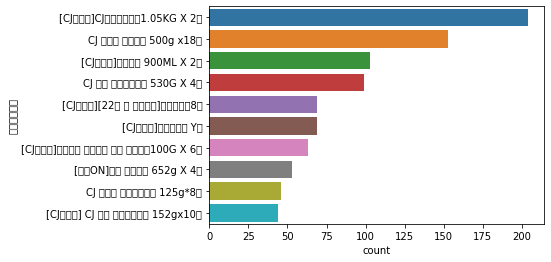

In [157]:
df_1['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_1, order=[df_1['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45257 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_

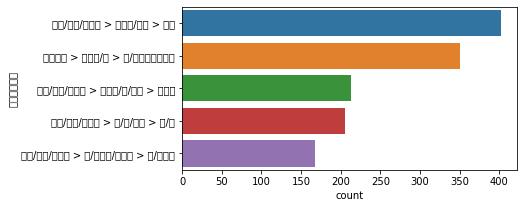

In [154]:
plt.figure(figsize=(6,3))
sns.countplot(y='표준카테고리', data=df_1, order=[df_1['표준카테고리'].value_counts().head(5).index[i] for i in range(0,5)])

-> 1월 : 만두 > 선물세트 > 즉석밥 > 국/탕 > 스테이크, 햄 등등
* 아무래도 설날 준비를 이유로 만두와 선물세트의 구매율이 많은 것으로 보입니다.
* 2022년 설 1~2주전에 만두와 선물세트에 대한 광고와 할인을 하는 실시하는 것을 제안합니다.

## 3) 2월 분석하기

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_

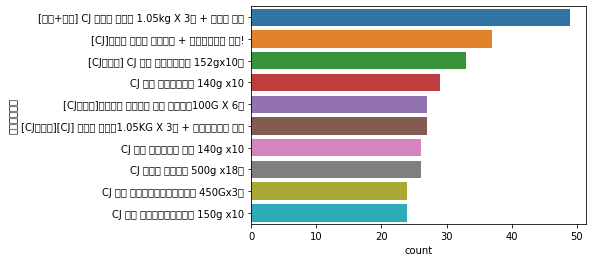

In [160]:
df_2['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_2, order=[df_2['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45257 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_

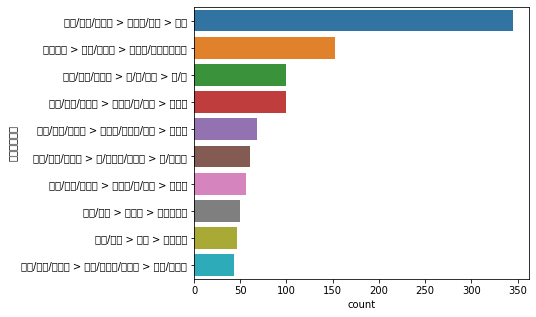

In [161]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_2, order=[df_2['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

-> 2월 : 만두 > 요리소스 > 즉석밥 > 국/탕 > 스테이크, 햄 등등
* 만두의 비율이 압도적으로 많으므로 할인을 실시했는지 원인 살펴보기(코드 삽입)

## 4) 3월 분석하기

In [ ]:
df_3['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_3, order=[df_3['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_3, order=[df_3['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

3월은 만두 > 조미료 > 국/탕 > 즉석밥/죽 > 돈가스

## 5) 4월 분석하기

In [ ]:
df_4['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_4, order=[df_4['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_4, order=[df_4['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

4월 - 만두 > 즉석밥 > 장류 > 돈가스 > 식용유

## 6) 5월 분석하기

In [ ]:
df_5['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_5, order=[df_5['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_5, order=[df_5['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

5월: 식용유 > 만두 > 즉석밥 > 젤리/푸딩
* 식용유 할인했는지 유입채널은 무엇인지 살펴보기 (코드 삽입)

## 7) 6월 분석하기

In [ ]:
df_6['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_6, order=[df_6['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_6, order=[df_6['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

6월 : 즉석밥 > 국/탕 > 볶음밥 > 만두 > 돈가스
* 즉석밥, 곰탕의 비율이 높다. 할인했는지, 유입채널은 무엇인지 살펴보기 (코드삽입)

## 8) 7월 분석하기

In [ ]:
df_7['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_7, order=[df_7['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_7, order=[df_7['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

7월: 즉석밥 > 푸딩 > 면 > 소스 > 국/탕 (즉석밥 행사 여전, 푸딩 행사 시작)
행사실시 코드 삽입

## 9) 8월 분석하기

In [ ]:
df_8['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_8, order=[df_8['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_8, order=[df_8['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

8월 : 즉석밥 > 국/탕 > 햄통조림 > 만두 > 식용유 (즉석밥 여러 행사 진행중, 국/탕 및 통조림 행사가 매출에 큰 영향을 미침)
코드 삽입

## 10) 9월 분석하기

In [ ]:
df_9['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_9, order=[df_9['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_9, order=[df_9['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

9월 : 즉석밥 > 돈가스 > 젤리 > 김치 > 국/탕 (돈가스랑, 젤리)
*코드 삽입

In [ ]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(5,2) # 그래프를 9개를 그려보겠습니다.

plt.figure(figsize=(15,30))  
plt.subplots_adjust(wspace=0.5, hspace=0.3) 

months = [i for i in range(1, 10)]

for idx, month in enumerate(months):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(y='표준카테고리',
                data=df[df['주문월'] == month],
                order=[df[df['주문월'] == month]['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)],
                palette='pastel',
                ax=ax
                )
    ax.set_title(f'Month {month}')

* 월별로 수요가 많은 상품에 대해 할인, 행사한 상품의 가격을 살펴보고 재무 상황에 맞추어 할인 주기적으로 진행하기
* 월별로 수요가 많은 상품의 유입채널을 살펴보아 광고 활성화하기


# 상품별 마케팅 방안 고안해보기

## 상관관계를 통해 분석하기

In [162]:
df.groupby(['주문월', '표준카테고리'])['주문접수일시'].count()

주문월  표준카테고리                    
1    가공식품 > 면류 > 국수                 1
     가공식품 > 면류 > 기타면류              33
     가공식품 > 면류 > 당면                 7
     가공식품 > 면류 > 우동                 1
     가공식품 > 면류 > 중화면               21
                                   ..
9    수산/건어물 > 수산선물세트 > 김/미역선물세트     3
     정육/계란 > 양념육 > 기타양념육           10
     정육/계란 > 양념육 > 돼지양념육            8
     커피/생수/음료 > 주스/과즙음료 > 과일음료     12
     커피/생수/음료 > 차류 > 과일청            3
Name: 주문접수일시, Length: 473, dtype: int64

In [163]:
df_tops = pd.DataFrame(data = [[0] * 9 for i in range(65)], 
                       columns=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월'], 
                       index=df['표준카테고리'].value_counts().sort_index().index )
df_tops['1월'] = df_1['표준카테고리'].value_counts().sort_values()
df_tops['2월'] = df_2['표준카테고리'].value_counts().sort_values()
df_tops['3월'] = df_3['표준카테고리'].value_counts().sort_values()
df_tops['4월'] = df_4['표준카테고리'].value_counts().sort_values()
df_tops['5월'] = df_5['표준카테고리'].value_counts().sort_values()
df_tops['6월'] = df_6['표준카테고리'].value_counts().sort_values()
df_tops['7월'] = df_7['표준카테고리'].value_counts().sort_values()
df_tops['8월'] = df_8['표준카테고리'].value_counts().sort_values()
df_tops['9월'] = df_9['표준카테고리'].value_counts().sort_values()

df_tops = df_tops.fillna(0)

In [164]:
df_tops

,1월,2월,3월,4월,5월,6월,7월,8월,9월
가공식품 > 면류 > 국수,1.0,2.0,2.0,2.0,0.0,4.0,3.0,2.0,1.0
가공식품 > 면류 > 기타면류,33.0,37.0,54.0,112.0,126.0,375.0,1200.0,222.0,66.0
가공식품 > 면류 > 당면,7.0,2.0,3.0,5.0,5.0,5.0,1.0,8.0,10.0
가공식품 > 면류 > 스파게티/파스타,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0
가공식품 > 면류 > 우동,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
수산/건어물 > 수산선물세트 > 김/미역선물세트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
정육/계란 > 양념육 > 기타양념육,46.0,50.0,55.0,24.0,17.0,45.0,83.0,27.0,10.0
정육/계란 > 양념육 > 돼지양념육,1.0,2.0,4.0,1.0,0.0,8.0,10.0,6.0,8.0
커피/생수/음료 > 주스/과즙음료 > 과일음료,0.0,1.0,2.0,4.0,9.0,273.0,11.0,15.0,12.0


In [165]:
df_topT = df_tops.transpose()

In [166]:
df_topT

,가공식품 > 면류 > 국수,가공식품 > 면류 > 기타면류,가공식품 > 면류 > 당면,가공식품 > 면류 > 스파게티/파스타,가공식품 > 면류 > 우동,가공식품 > 면류 > 중화면,가공식품 > 밀가루/믹스류 > 미숫가루,가공식품 > 밀가루/믹스류 > 밀가루,가공식품 > 밀가루/믹스류 > 베이킹믹스,가공식품 > 밀가루/믹스류 > 튀김/부침가루,...,냉장/냉동/간편식 > 피자/핫도그/햄버거 > 핫도그,냉장/냉동/간편식 > 햄/소시지/베이컨 > 베이컨/슬라이스햄,냉장/냉동/간편식 > 햄/소시지/베이컨 > 햄/소시지,수산/건어물 > 김/해조류 > 조미김/도시락김,수산/건어물 > 생선 > 반조리생선,수산/건어물 > 수산선물세트 > 김/미역선물세트,정육/계란 > 양념육 > 기타양념육,정육/계란 > 양념육 > 돼지양념육,커피/생수/음료 > 주스/과즙음료 > 과일음료,커피/생수/음료 > 차류 > 과일청
1월,1.0,33.0,7.0,0.0,1.0,21.0,0.0,0.0,7.0,0.0,...,8.0,5.0,168.0,68.0,71.0,0.0,46.0,1.0,0.0,1.0
2월,2.0,37.0,2.0,0.0,0.0,16.0,0.0,0.0,2.0,1.0,...,26.0,4.0,60.0,20.0,24.0,0.0,50.0,2.0,1.0,0.0
3월,2.0,54.0,3.0,2.0,1.0,21.0,0.0,0.0,4.0,0.0,...,37.0,4.0,78.0,48.0,18.0,0.0,55.0,4.0,2.0,0.0
4월,2.0,112.0,5.0,1.0,0.0,10.0,0.0,0.0,14.0,3.0,...,31.0,1.0,142.0,21.0,11.0,0.0,24.0,1.0,4.0,4.0
5월,0.0,126.0,5.0,2.0,0.0,28.0,0.0,5.0,24.0,4.0,...,310.0,4.0,161.0,27.0,17.0,0.0,17.0,0.0,9.0,2.0
6월,4.0,375.0,5.0,0.0,0.0,14.0,0.0,7.0,18.0,1.0,...,333.0,1.0,192.0,31.0,1.0,0.0,45.0,8.0,273.0,4.0
7월,3.0,1200.0,1.0,0.0,0.0,26.0,159.0,4.0,24.0,0.0,...,43.0,1.0,85.0,109.0,0.0,0.0,83.0,10.0,11.0,2.0
8월,2.0,222.0,8.0,0.0,0.0,28.0,34.0,1.0,13.0,0.0,...,43.0,3.0,99.0,76.0,0.0,0.0,27.0,6.0,15.0,3.0
9월,1.0,66.0,10.0,0.0,0.0,29.0,13.0,1.0,19.0,0.0,...,31.0,3.0,45.0,27.0,0.0,3.0,10.0,8.0,12.0,3.0


In [167]:
df_topT.corr().head()

,가공식품 > 면류 > 국수,가공식품 > 면류 > 기타면류,가공식품 > 면류 > 당면,가공식품 > 면류 > 스파게티/파스타,가공식품 > 면류 > 우동,가공식품 > 면류 > 중화면,가공식품 > 밀가루/믹스류 > 미숫가루,가공식품 > 밀가루/믹스류 > 밀가루,가공식품 > 밀가루/믹스류 > 베이킹믹스,가공식품 > 밀가루/믹스류 > 튀김/부침가루,...,냉장/냉동/간편식 > 피자/핫도그/햄버거 > 핫도그,냉장/냉동/간편식 > 햄/소시지/베이컨 > 베이컨/슬라이스햄,냉장/냉동/간편식 > 햄/소시지/베이컨 > 햄/소시지,수산/건어물 > 김/해조류 > 조미김/도시락김,수산/건어물 > 생선 > 반조리생선,수산/건어물 > 수산선물세트 > 김/미역선물세트,정육/계란 > 양념육 > 기타양념육,정육/계란 > 양념육 > 돼지양념육,커피/생수/음료 > 주스/과즙음료 > 과일음료,커피/생수/음료 > 차류 > 과일청
가공식품 > 면류 > 국수,1.000000,0.529143,-0.403473,-0.418461,-0.188982,-0.474875,0.345922,3.644657e-01,-0.001456,-0.357143,...,0.121522,-0.705024,0.098911,0.241620,-0.412223,-0.285714,0.581406,0.624690,0.678856,0.286658
가공식품 > 면류 > 기타면류,0.529143,1.000000,-0.486172,-0.289711,-0.308963,0.190765,0.947822,4.920073e-01,0.568422,-0.216899,...,0.053898,-0.618833,-0.047948,0.725835,-0.400502,-0.181790,0.681002,0.673307,0.152624,0.174039
가공식품 > 면류 > 당면,-0.403473,-0.486172,1.000000,-0.223301,-0.021786,0.348363,-0.406498,-1.633913e-01,0.127470,-0.115278,...,-0.040286,0.200059,0.055651,-0.197158,0.034747,0.634029,-0.781514,0.018283,0.008590,0.447006
가공식품 > 면류 > 스파게티/파스타,-0.418461,-0.289711,-0.223301,1.000000,0.285714,0.015991,-0.310092,-1.189525e-17,0.009630,0.566947,...,0.271402,0.235727,0.129046,-0.304802,0.013199,-0.236228,-0.190192,-0.509534,-0.248157,-0.235727
가공식품 > 면류 > 우동,-0.188982,-0.308963,-0.021786,0.285714,1.000000,-0.036550,-0.248073,-4.285714e-01,-0.581648,-0.377964,...,-0.323231,0.594442,0.092433,0.194337,0.718294,-0.188982,0.271703,-0.299726,-0.225308,-0.594442


In [168]:
df_topT.corr()['냉장/냉동/간편식 > 떡볶이/만두 > 만두'].sort_values(ascending=False)[1:6]

가공식품 > 조미료/양념 > 가공/구운소금       0.806825
가공식품 > 장류 > 고추장/초고추장          0.777747
가공식품 > 식용유/오일 > 카놀라유          0.672990
냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥    0.634193
가공식품 > 조미료/양념 > 식초            0.577602
Name: 냉장/냉동/간편식 > 떡볶이/만두 > 만두, dtype: float64

In [169]:
df_topT.corr()['냉장/냉동/간편식 > 떡볶이/만두 > 만두'].sort_values(ascending=False).index[1:6]

Index(['가공식품 > 조미료/양념 > 가공/구운소금', '가공식품 > 장류 > 고추장/초고추장',
       '가공식품 > 식용유/오일 > 카놀라유', '냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥',
       '가공식품 > 조미료/양념 > 식초'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45257 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_

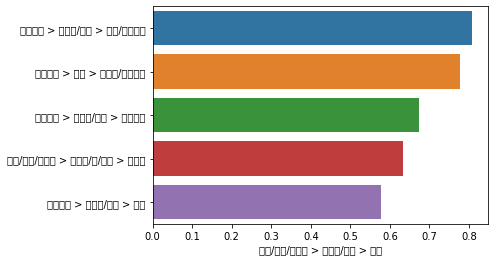

In [170]:
sns.barplot(y=df_topT.corr()['냉장/냉동/간편식 > 떡볶이/만두 > 만두'].sort_values(ascending=False).index[1:6],
            x=df_topT.corr()['냉장/냉동/간편식 > 떡볶이/만두 > 만두'].sort_values(ascending=False)[1:6])

In [171]:
df_topT.corr()['가공식품 > 소스/드레싱 > 굴소스/중화요리소스'].sort_values(ascending=False)

가공식품 > 소스/드레싱 > 굴소스/중화요리소스       1.000000
김치/반찬 > 김치 > 총각김치                0.702929
냉장/냉동/간편식 > 국/탕/찌개 > 찌개          0.629805
가공식품 > 통조림/캔 > 닭가슴살통조림           0.516570
정육/계란 > 양념육 > 돼지양념육              0.490461
                                   ...   
가공식품 > 면류 > 스파게티/파스타            -0.639510
과자/간식 > 디저트/케이크 > 푸딩            -0.643951
냉장/냉동/간편식 > 햄/소시지/베이컨 > 햄/소시지   -0.693776
가공식품 > 밀가루/믹스류 > 튀김/부침가루        -0.719601
과자/간식 > 기타간식 > 김스낵              -0.868193
Name: 가공식품 > 소스/드레싱 > 굴소스/중화요리소스, Length: 65, dtype: float64

In [ ]:
sns.barplot(y=df_topT.corr()['가공식품 > 소스/드레싱 > 굴소스/중화요리소스'].sort_values(ascending=False).index[1:6],
            x=df_topT.corr()['가공식품 > 소스/드레싱 > 굴소스/중화요리소스'].sort_values(ascending=False)[1:6])

In [172]:
df_topT.corr()['가공식품 > 식용유/오일 > 식용유/오일선물세트'].sort_values(ascending=False)

가공식품 > 식용유/오일 > 식용유/오일선물세트      1.000000
가공식품 > 밀가루/믹스류 > 튀김/부침가루        0.777364
가공식품 > 조미료/양념 > 갈색설탕            0.649141
냉장/냉동/간편식 > 피자/핫도그/햄버거 > 핫도그    0.627739
가공식품 > 면류 > 스파게티/파스타            0.614207
                                  ...   
냉장/냉동/간편식 > 즉석밥/죽/스프 > 컵밥      -0.395588
김치/반찬 > 김치 > 총각김치              -0.409879
정육/계란 > 양념육 > 돼지양념육            -0.447109
가공식품 > 소스/드레싱 > 굴소스/중화요리소스     -0.451132
가공식품 > 면류 > 국수                 -0.585149
Name: 가공식품 > 식용유/오일 > 식용유/오일선물세트, Length: 65, dtype: float64

In [ ]:
sns.barplot(y=df_topT.corr()['가공식품 > 식용유/오일 > 식용유/오일선물세트'].sort_values(ascending=False).index[1:6],
            x=df_topT.corr()['가공식품 > 식용유/오일 > 식용유/오일선물세트'].sort_values(ascending=False)[1:6])

In [173]:
df_topT.corr()['가공식품 > 장류 > 고추장/초고추장'].sort_values(ascending=False)

가공식품 > 장류 > 고추장/초고추장                1.000000
냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥          0.959144
냉장/냉동/간편식 > 돈가스/고로케/너겟 > 돈가스        0.903060
가공식품 > 식용유/오일 > 카놀라유                0.844303
냉장/냉동/간편식 > 국/탕/찌개 > 국/탕            0.843184
                                      ...   
과자/간식 > 기타간식 > 김스낵                 -0.359094
가공식품 > 면류 > 우동                     -0.373554
가공식품 > 식용유/오일 > 올리브유               -0.373554
수산/건어물 > 생선 > 반조리생선                -0.503663
냉장/냉동/간편식 > 밀키트/쿠킹박스 > 중식/일식/아시아   -0.515084
Name: 가공식품 > 장류 > 고추장/초고추장, Length: 65, dtype: float64

In [ ]:
sns.barplot(y=df_topT.corr()['가공식품 > 장류 > 고추장/초고추장'].sort_values(ascending=False).index[1:6],
            x=df_topT.corr()['가공식품 > 장류 > 고추장/초고추장'].sort_values(ascending=False)[1:6])

## 상품별 마케팅 제안

* 각 상품별로 분석!!

* 1. 만두, 즉석밥, 국/탕, 돈가스 - 매월 상위권 차트에 있으며, 계절에 상관없이 많이 사는 것으로 파악된다. 계절 상관없이, 이벤트를 진행한다면, 매출이 떡상할 가능성이 보인다.

* 2. 중화요리소스 - 유독 2월에만 상위권이며, 2월에는 전체적인 주문량이 너무 적은 점을 보완하여, 상관관계가 높은 김치/찌개와 함께 이벤트를 진행하면 좋을 것 같다.

* 3. 캔/통조림 선물세트 - 주로 설/추석 기간에 선물세트로 주문 상위권에 올라오는 것 같으며, 명절 기간에 홍보, 할인 이벤트를 집중적으로 하면 좋을 것 같다.

* 4. 젤리/푸딩 - 유독 여름에만 매출이 많은 상품으로, 여름에 홍보 효과를 강화하면 좋을 것 같다.

* 5. 식용유 및 고추장 - 각자 상관관계가 높은 상품과 함께 이벤트 진행하면 좋을 것 같다.

# 3. 월별로 매출과 판매량이 가장 많은 날짜를 중점으로 분석하기

## 1) 필요한 변수 생성하기

In [189]:
df['유입채널 대분류'] = '기타 및 이벤트 광고'
df.loc[((df['유입채널'] == '유실 채널상세') | (df['유입채널'] == '디폴트 채널상세')), '유입채널 대분류'] = 'CJ 앱/사이트'
df.loc[df['유입채널'].str.contains('가격비교'), '유입채널 대분류'] = '가격비교'
df.loc[df['유입채널'].str.contains('모바일'), '유입채널 대분류'] = '모바일 공유'
df.loc[df['유입채널'].str.contains('검색'), '유입채널 대분류'] = '검색'

In [183]:
#주문 시간빼고 날짜만 있는 변수 생성
df['주문날짜'] = df['주문번호']//(10**8)

In [184]:
df['주문날짜'].astype(str)

0        20220101
1        20220101
2        20220101
3        20220101
4        20220101
           ...   
93315    20220930
93316    20220930
93317    20220930
93318    20220930
93319    20220930
Name: 주문날짜, Length: 93320, dtype: object

In [185]:
df['주문날짜'] = pd.to_datetime(df['주문날짜'], format = "%Y%m%d")

In [186]:
df['주문날짜'].head()

0   2022-01-01
1   2022-01-01
2   2022-01-01
3   2022-01-01
4   2022-01-01
Name: 주문날짜, dtype: datetime64[ns]

In [187]:
#일별 파악을 위해 변수 생성
df['주문day'] = df['주문날짜'].dt.day

In [188]:
df['주문day']

0         1
1         1
2         1
3         1
4         1
         ..
93315    30
93316    30
93317    30
93318    30
93319    30
Name: 주문day, Length: 93320, dtype: int64

In [123]:
#판매량이 많은 순서를 알아보기
df.groupby('주문날짜')['주문번호'].count()

주문날짜
2022-01-01     30
2022-01-02     21
2022-01-03    114
2022-01-04     36
2022-01-05     78
             ... 
2022-09-26    284
2022-09-27    160
2022-09-28    371
2022-09-29    130
2022-09-30    330
Name: 주문번호, Length: 273, dtype: int64

## 2) 월별로 가장 많은 판매량이 나온 날짜 그래프를 통해 분석하기

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0, flags=flags)


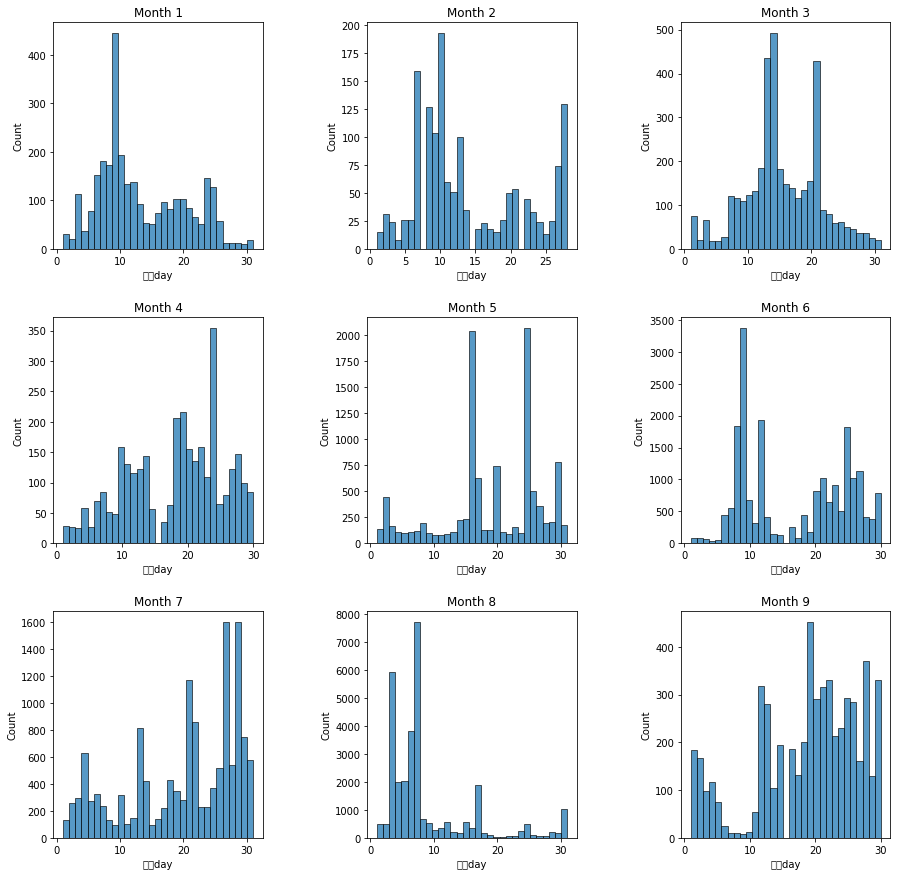

In [124]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(3,3) # 그래프를 9개를 그려보겠습니다.

plt.figure(figsize=(15,15))  
plt.subplots_adjust(wspace=0.5, hspace=0.3) 

months = [i for i in range(1, 10)]

for idx, month in enumerate(months):
    ax = plt.subplot(grid[idx])
    
    sns.histplot(x='주문day',
                 data=df[df['주문월'] == month],
                 palette='pastel',
                 bins=max(df['주문day']),
                 ax=ax
                )
    ax.set_title(f'Month {month}')

- 판매량이 많은 날짜
(-주변 날짜보다 2~3배 이상 눈에 띄게 큰 날짜를 중점적으로 파악하였습니다. -2월은 판매량 자체가 너무 적으므로 생략하였습니다.)
* 1월 - 9일
* 3월 - 13, 14일, 21일
* 4월 - 24일
* 5월 - 16일, 25일 (2천건 이상)
* 6월 - 8일, 9일(3천건), 12일, 25일
* 7월 - 4일, 13일, 21일, 27일, 29일
* 8월 - 3일, 6일, 7일(가장 많음, 7천건 이상), 17일, 31일에도 유독 많음
* 9월 - 19일 (상대적으로 다른 달에 비해 너무 적지만 그나마 많은 날짜)

## 3) 월별로 가장 많은 판매액(매출)이 나온 날짜 그래프를 통해 분석하기

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text

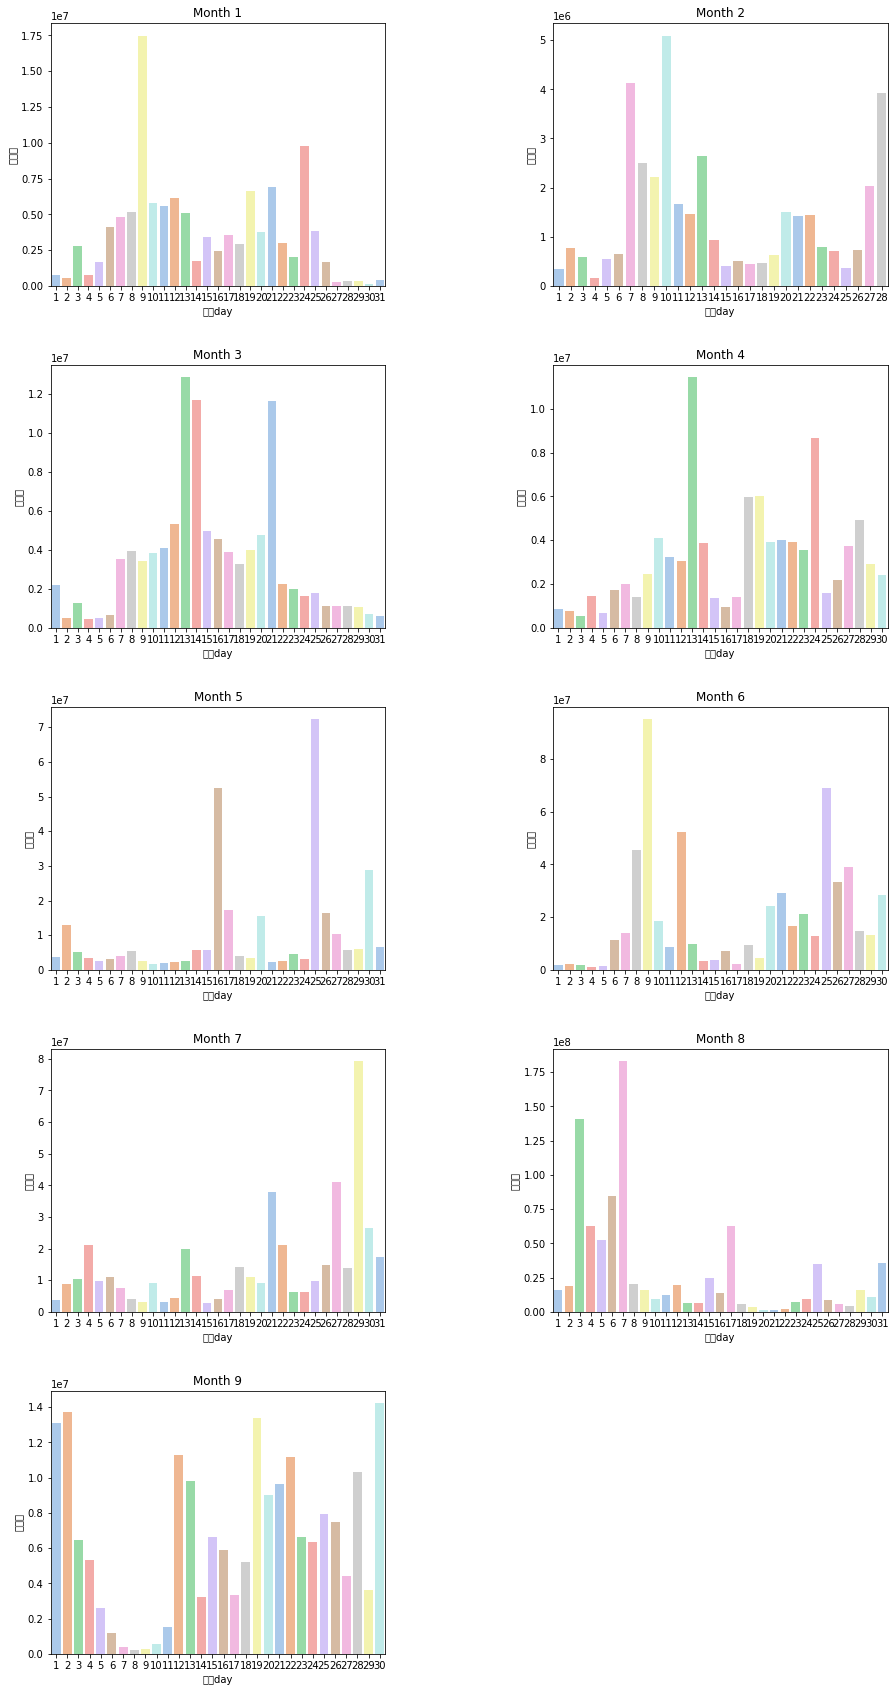

In [127]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(5,2) # 그래프를 9개를 그려보겠습니다.

plt.figure(figsize=(15,30))  
plt.subplots_adjust(wspace=0.5, hspace=0.3) 

months = [i for i in range(1, 10)]

for idx, month in enumerate(months):
    ax = plt.subplot(grid[idx])
    
    sns.barplot(x='주문day',
                y='판매액',
                estimator=sum,
                ci=None,
                data=df[df['주문월'] == month],
                palette='pastel',
                ax=ax
                )
    ax.set_title(f'Month {month}')

* 매출이 큰 날짜 
(-상대적으로 매출이 적은 2월은 제외하였습니다.
-또한 9월은 판매량이 적고 매출도 눈에 띄게 많이 나온 날짜가 없어 제외하였습니다.)
* 1월 - 9일, 24일
* 3월 - 13, 14일, 21일
* 4월 - 13, 24일
* 5월 - 16일, 25일
* 6월 - 8일, 9일(3천건), 12일, 25일
* 7월 - 4일, 13일, 21일, 27일, 29일
* 8월 - 3일, 6일, 7일(가장 많음, 7천건 이상), 17, 25, 31일에도 유독 많음

* 주문건수가 많은 날은 대체로 매출도 높은 경향이 있습니다.
* 특히 주문건수, 매출이 모두 높은 날짜

* 1월 9, 24일 
* 3월 13, 14, 21일, 
* 4월 24일, 
* 5월 16, 25일 (5월부터 기하급수적으로 늘어나기 시작) 
* 6월 8,9,11, 25일, 
* 7월 4, 13, 21, 27, 29일, 
* 8월 3, 6, 7일

### 1월 데이터 (9, 24일)

In [194]:
# 1월 데이터 (9, 24일 살펴보기)

df0109 = df[df['주문날짜'] == '2022-01-09']
df0124 = df[df['주문날짜'] == '2022-01-24']

9일부터 살펴보겠습니다.

In [195]:
# 왕교자, 사골곰탕, 짬뽕 등이 이날 유독 많이 판매되었습니다.
df0109['판매자상품명'].value_counts().head(10)

[CJ직배송]CJ비비고왕교자1.05KG X 2개           150
CJ 비비고 사골곰탕 500g x18봉                 60
[CJ직배송]포도씨유 900ML X 2개                28
[롯데ON]고메 중화짬뽕 652g X 4개               25
[CJ직배송]더건강한 닭가슴살 직화 통살구이100G X 6개     13
고메 바삭쫄깃한 탕수육 450gx3개                  12
[CJ직배송] CJ 햇반 백미 210g x 36개           10
CJ 스팸 클래식 340gx4개                      9
CJ 다담 된장찌개양념 530G X 4개                 7
CJ 다담 매운버섯칼국수양념 150g x10               6
Name: 판매자상품명, dtype: int64

In [197]:
df0109['유입채널 대분류'].value_counts()

가격비교           184
CJ 앱/사이트       183
검색              37
기타 및 이벤트 광고     36
모바일 공유           5
Name: 유입채널 대분류, dtype: int64

In [198]:
df0109.groupby('판매자상품명')['판매액'].sum().sort_values(ascending=False)

판매자상품명
[CJ직배송]CJ비비고왕교자1.05KG X 2개             2694000
[CJ직배송][22년 설 선물세트]21년 설 비비고 토종김 5호    2083300
CJ 비비고 사골곰탕 500g x18봉                  1490400
[CJ직배송][22년 설 선물세트]스팸마일드8호             1206400
[CJ직배송][22년 설 선물세트]백설 고소함가득 참기름 A호     1044000
                                        ...   
CJ 다담 청국장찌개 양념 130g x10                  13800
[CJ직배송]더건강한 닭가슴살 소시지120G X 6개            12000
다담 부대찌개 양념 140G *8                       11040
[CJ직배송]사계절쌈장500G X 3개                     7440
[CJ직배송]백설소불고기양념290g X 2개                  5160
Name: 판매액, Length: 87, dtype: int64

In [199]:
print(df[df['판매자상품명'] == '[CJ직배송]CJ비비고왕교자1.05KG X 2개']['판매가'].unique())
print(df[df['판매자상품명'] == '[CJ직배송][22년 설 선물세트]21년 설 비비고 토종김 5호']['판매가'].unique())

[21330 17960 19920 22760 23620 23710 26620 19960 27730]
[ 8300 10420 10000]


In [202]:
# 9일을 살펴보니 할인을 진행했다는 것을 알 수 있습니다.

print(df0109[df0109['판매자상품명'] == '[CJ직배송]CJ비비고왕교자1.05KG X 2개']['판매가'].unique())
print(df0109[df0109['판매자상품명'] == '[CJ직배송][22년 설 선물세트]21년 설 비비고 토종김 5호']['판매가'].unique())

[17960]
[8300]


In [ ]:
# 이건 매출액이 커서 살펴보았더니 주문 한 건에서 250개를 사갔습니다.
# 이건 순간적인 효과라서 중요한 변수로 보긴 어려울 것 같습니다.
# 수량보다는 주문 건수가 중요한 변수인 것으로 보입니다.

df0109[df0109['판매자상품명'] == '[CJ직배송][22년 설 선물세트]21년 설 비비고 토종김 5호']['수량']

In [205]:
## 1월 9일날은 가격비교 사이트가 압도적으로 높습니다.

df0109.groupby('유입채널 대분류')['판매액'].sum().sort_values(ascending=False)

유입채널 대분류
가격비교           9920380
CJ 앱/사이트       5637580
검색             1055300
기타 및 이벤트 광고     777900
모바일 공유           99760
Name: 판매액, dtype: int64

In [211]:
## 1월 9일날은 가격비교 사이트가 압도적으로 높습니다.

df0109.groupby('유입채널')['판매액'].sum().sort_values(ascending=False)

유입채널
[네이버] PCS 가격비교_롯데ON                7715860
디폴트 채널상세                           5619620
[에누리] PCS 가격비교_롯데ON                1349760
[네이버] 키워드_쇼핑검색광고_롯데ON              1036300
[다나와] PCS 가격비교_롯데ON                 589200
[롯데ON][PUSH][실시간 BEST 🕠]            430380
[다음카카오] PCS 가격비교_롯데ON               265560
[모바일]카카오톡                            99760
[롯데ON][알림톡][[롯데ON] 주문 완료 안내]         73700
webtoapp                             53960
[롯데마트][애프터위크 혜택, 이대로는 못보내지😘]         41960
[롯데ON] MO Web 행사장_21.07_월간APP혜택      35920
[구글] SA_롯데ON                         24840
[네이버] 키워드_롯데ON                       24840
브이피                                  20460
[네이버] PC_브랜드검색_롯데ON                  19000
[롯데ON][알림톡][[롯데ON] 배송완료 안내]          17960
[롯데ON][애프터위크 라스트찬스🙋!]                17960
[롯데ON][알림톡][[롯데ON] 주문취소 안내]          17960
[롯데ON][알림톡][ [롯데ON] 주문완료 안내]         17960
유실 채널상세                              17960
Name: 판매액, dtype: int64

1월 설에는 만두나 설 선물세트 할인행사를 활성화하고 가격비교 사이트에 광고를 싣는 것을 제안합니다.
또한 CJ/앱 푸시알림을 전 고객에게 활성화하는 것을 제안합니다.

In [ ]:
24일 살펴보겠습니다.

In [208]:
# 1/24날은 설 선물 세트로 매출을 올린 것 같아 보입니다.
df0124.groupby('판매자상품명')['판매액'].sum().sort_values(ascending=False).head(10)

판매자상품명
[CJ직배송]특별한선택 Y호                    3128850
[CJ직배송][22년 설 선물세트]스팸1호            1670720
[CJ직배송][22년 설 선물세트]스팸3호            1567280
[CJ직배송] 최저가 혜택! 22년 설 선물 스팸 S2호    1313650
[CJ직배송][22년 설 선물세트]유러피안 P2호 x4개     463900
[CJ직배송]백설100%통참깨참기름300ML X 2개       167520
[CJ직배송][22년 설 선물세트]스팸고급유7호          135000
비비고 한섬만두 384G*2EA *2                 90480
[CJ직배송]비비고 도톰동그랑땡 425G*2 X2개         64140
[CJ직배송][22년 설 선물세트]스팸12호             63900
Name: 판매액, dtype: int64

In [215]:
# 하지만 1/24날 가장 많은 주문이 들어온 상품은 주문건수가 극단적으로 많지 않다.
print(df0124[df0124['판매자상품명'] == '[CJ직배송][22년 설 선물세트]스팸3호']['유입채널 대분류'].value_counts())
print('\n')
print(df0124[df0124['판매자상품명'] == '[CJ직배송]특별한선택 Y호']['유입채널 대분류'].value_counts())
print('\n')
print(df0124[df0124['판매자상품명'] == '[CJ직배송]특별한선택 Y호']['수량'].unique())

CJ 앱/사이트    25
Name: 유입채널 대분류, dtype: int64


가격비교        19
CJ 앱/사이트    16
검색           1
모바일 공유       1
Name: 유입채널 대분류, dtype: int64


[2 8 1 5]


In [213]:
# 1월 9일날은 가격비교 사이트 9백 만원의 매출을 거두었는데, 이 날은 123만원을 거두었습니다.
df0124.groupby('유입채널 대분류')['판매액'].sum().sort_values(ascending=False)

유입채널 대분류
CJ 앱/사이트       7994416
가격비교           1233348
기타 및 이벤트 광고     427540
검색               67360
모바일 공유           54760
Name: 판매액, dtype: int64

* 1월 9일 판매 데이터는 네이버를 통한 PCS 가격비교_롯데ON이 142건이나 되는데, 1월 24일 판매 데이터는 디폴트 채널에서만 거의 판매되었다. 가격에 대한 메리트가 크지 않아 그런 것이라 생각되지만 설 선물세트는 매출을 크게 차지하는 만큼 광고를 활성화하면 좋을 것을 생각됩니다.

## 3월 데이터 (13~14, 21일)

In [216]:
df0313 = df[(df['주문날짜'] == '2022-03-13') | (df['주문날짜'] == '2022-03-14')]
df0321 = df[df['주문날짜'] == '2022-03-21']

13일부터 살펴보겠습니다.

In [217]:
# 이 날은 CJ 만두, 비비고 식품 등이 많이 팔렸습니다.
df0313['판매자상품명'].value_counts()

[CJ직배송][CJ] 비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정           381
천일염 소금/ 사골곰탕/비비고 죽/더비비고 특가 골라담기                       96
고메 바삭쫄깃한 탕수육 450gx3개                                  23
고메 순살 후라이드 치킨 550gx3개                                 12
다담 된장찌개양념 530Gx2개                                      9
                                                    ... 
[CJ직배송] 백설 토마토스파게티소스610G+로제 610G+아라비아따610G+면 500G      1
[CJ직배송]물냉면908G+비빔냉면474.4GX2개                           1
[CJ직배송][CJ]비비고왕교자455GX4봉+김치왕교자X2봉+수제고기만두증정             1
[CJ직배송]햇반 저단백밥180G(원형) X10개                            1
[사은품] 해찬들 우리쌀태양초골드고추장1kg+쇠고기볶음고추장500GX2                1
Name: 판매자상품명, Length: 204, dtype: int64

In [219]:
# 가격비교를 통해 약 300~400건, CJ 앱/사이트를 통해 약 500건 정도 주문이 들어왔습니다.
df0313['유입채널 대분류'].value_counts()

CJ 앱/사이트       474
가격비교           380
기타 및 이벤트 광고     45
검색              25
모바일 공유           4
Name: 유입채널 대분류, dtype: int64

In [220]:
# 이날은 만두가 매출이 무려 1187만원이나 될어 원인을 분석해보았습니다.
df0313.groupby('판매자상품명')['판매액'].sum().sort_values(ascending=False).head(10)

판매자상품명
[CJ직배송][CJ] 비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정    11877440
천일염 소금/ 사골곰탕/비비고 죽/더비비고 특가 골라담기                 938748
고메 바삭쫄깃한 탕수육 450gx3개                            666450
고메 순살 후라이드 치킨 550gx3개                           549000
[3/9 이후 출고][CJ직배송] CJ 햇반 발아현미밥 210Gx24개         363060
비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개               322920
CJ 비비고 수제고기만두x2개+수제김치만두x2개                      262400
CJ 비비고 왕교자 1.05x2개+새우왕교자315gx2개                 235600
[CJ직배송]사골곰탕 500G X 15봉 +영양꼬리곰탕 증정               225000
[특가+증정] CJ 비비고 왕교자 1.05kg X 3개 + 찐만두 증정         223440
Name: 판매액, dtype: int64

In [221]:
# 할인도 하지 않았습니다.
print(df0313[df0313['판매자상품명'] == '[CJ직배송][CJ] 비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정']['판매가'].unique())
print(df[df['판매자상품명'] == '[CJ직배송][CJ] 비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정']['판매가'].unique())

[30560 33440]
[30140 26000 30560 33440 27000 34000]


In [222]:
# 수량에 이상치가 있나 확인해보아도 다들 1개나 2개씩 밖에 주문하지 않았습니다.
df0313[df0313['판매자상품명'] == '[CJ직배송][CJ] 비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정']['수량'].unique()

array([1, 2])

In [223]:
# 네이버가 엄청난 매출을 올리는데 도와준 것 같습니다. 원인은 유입매체였습니다.
df0313[df0313['판매자상품명'] == '[CJ직배송][CJ] 비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정']['유입채널'].value_counts()

[네이버] PCS 가격비교_롯데ON             257
디폴트 채널상세                         53
유실 채널상세                          45
[다나와] PCS 가격비교_롯데ON              10
[다음카카오] PCS 가격비교_롯데ON             7
[모바일]카카오톡                         3
[네이버] MO_브랜드검색_롯데ON               2
[롯데ON][PUSH][실시간 BEST 🕠]          2
[모바일]다른앱공유하기                      1
[롯데ON][알림톡][[롯데ON] 주문 완료 안내]      1
Name: 유입채널, dtype: int64

21일 살펴보겠습니다.

In [224]:
df0321['판매자상품명'].value_counts()

[CJ직배송][CJ] 비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정    305
비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개              12
비비고 사골곰탕 500g X18                               8
CJ 해찬들 우리쌀로만든태양초골드고추장2kgP X 2개                  5
[특가+증정] CJ 비비고 왕교자 1.05kg X 3개 + 찐만두 증정         5
                                             ... 
[CJ직배송]산들애 한우 250G X2개                          1
사천마라탕면 2인분 434G x4                              1
프리미엄 햇반컵반 육개장국밥 217g x8                         1
[CJ직배송]해바라기씨유 900ML X 2개                        1
비비고 열무김치 500G x2                                1
Name: 판매자상품명, Length: 79, dtype: int64

In [226]:
# 3/13과는 다르게 이번에는 네이버가 원인이지 않습니다.
df0321['유입채널 대분류'].value_counts()

CJ 앱/사이트       377
가격비교            25
기타 및 이벤트 광고     22
모바일 공유           4
검색               1
Name: 유입채널 대분류, dtype: int64

In [227]:
# 이번에도 만두의 비율이 매출에 영향을 많이 끼쳤습니다.
df0321.groupby('판매자상품명')['판매액'].sum().sort_values(ascending=False).head(10)

판매자상품명
[CJ직배송][CJ] 비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정    8262000
비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개              420000
[CJ직배송]CJ 꼬마 돈까스 450G X3개                      179100
비비고 사골곰탕 500g X18                              176000
[특가+증정] CJ 비비고 왕교자 1.05kg X 3개 + 찐만두 증정        140000
CJ 해찬들 우리쌀로만든태양초골드고추장2kgP X 2개                 130250
비비고 찰보리감자만두 600G x6                             96000
[CJ직배송]비비고 김스낵 오리지널 36g                         87120
고메 함박스테이크 540Gx3개                               78000
CJ 비비고 왕교자 1.05x2개+새우왕교자315gx2개                 78000
Name: 판매액, dtype: int64

In [228]:
# 원인은 할인이였던 것으로 분석되었습니다.
print(df0321[df0321['판매자상품명'] == '[CJ직배송][CJ] 비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정']['판매가'].unique())
print(df[df['판매자상품명'] == '[CJ직배송][CJ] 비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정']['판매가'].unique())

[27000]
[30140 26000 30560 33440 27000 34000]


만두는 네이버에 광고를 지속적으로 띄우거나 할인행사를 진행할 때 앱 푸시 알림을 더욱더 활성화시켜야 하겠습니다.

## 4월 데이터 (24일)
* 4/13은 주문 건수가 적은데, 매출만 커서 1/9때 250개 주문한 효과인 것 같아 24일만 분석해보았습니다.

In [229]:
df0424 = df[df['주문날짜'] == '2022-04-24']

In [231]:
# 천일염/ 곰탕 특가, 포도씨유의 주문건수가 높습니다.
df0424['판매자상품명'].value_counts()

천일염 소금/ 사골곰탕/비비고 죽/더비비고 특가 골라담기          28
[CJ직배송]포도씨유 900ML X 2개                   26
[6+3]비비고 프리미엄 죽 6개 골라담기 +보양닭백숙죽 3개 증정    13
다담 된장찌개양념 530Gx3개                        11
다담 된장찌개양념 530G X 4개                      11
                                         ..
[CJ직배송]비비고 전복미역국 X 3개                     1
[비비고X사내맞선] 비비고 육개장 500GX6개                1
[비비고X사내맞선]비비고 버섯야채죽 420G X3개              1
[비비고X사내맞선]비비고 삼선해물죽 420G X3개              1
[비비고X사내맞선]비비고 총각김치 500G x3개               1
Name: 판매자상품명, Length: 168, dtype: int64

In [235]:
# 많이 팔리고, 매출도 큰 포도씨유를 집중 분석하겠습니다.
df0424.groupby('판매자상품명')['판매액'].sum().sort_values(ascending=False).head(10)

판매자상품명
[CJ직배송]포도씨유 900ML X 2개                   741200
[6+3]비비고 프리미엄 죽 6개 골라담기 +보양닭백숙죽 3개 증정    442000
고메 바삭쫄깃한 탕수육 450gx3개                     344520
천일염 소금/ 사골곰탕/비비고 죽/더비비고 특가 골라담기          276800
다담 된장찌개양념 530G X 4개                      234740
[CJ직배송]햇반 발아현미밥 작은공기 130G*3번들 X7개        224560
[채식만두]비비고 플랜테이블 왕교자 골라담기                 221220
[비비고X사내맞선]왕교자 1.05kgx2 + 김치왕교자 420gx2    202580
[CJ직배송] CJ 햇반 매일잡곡밥 210g x 24개           193600
[파티컵증정]고메 순살 후라이드 치킨 550gx3개             187920
Name: 판매액, dtype: int64

In [230]:
# 천일염/ 곰탕은 특가여서 건수가 많지만 포도씨유야가 높은 원인을 살펴봐야겠습니다.
df0424['판매자상품명'].value_counts()

천일염 소금/ 사골곰탕/비비고 죽/더비비고 특가 골라담기          28
[CJ직배송]포도씨유 900ML X 2개                   26
[6+3]비비고 프리미엄 죽 6개 골라담기 +보양닭백숙죽 3개 증정    13
다담 된장찌개양념 530Gx3개                        11
다담 된장찌개양념 530G X 4개                      11
                                         ..
[CJ직배송]비비고 전복미역국 X 3개                     1
[비비고X사내맞선] 비비고 육개장 500GX6개                1
[비비고X사내맞선]비비고 버섯야채죽 420G X3개              1
[비비고X사내맞선]비비고 삼선해물죽 420G X3개              1
[비비고X사내맞선]비비고 총각김치 500G x3개               1
Name: 판매자상품명, Length: 168, dtype: int64

In [237]:
# 보통 유입채널로 들어왔습니다.
print(df0424[df0424['판매자상품명'] == '[CJ직배송]포도씨유 900ML X 2개']['유입채널 대분류'].value_counts())

CJ 앱/사이트       22
가격비교            3
기타 및 이벤트 광고     1
Name: 유입채널 대분류, dtype: int64


In [238]:
# 할인의 효과도 아닌 것 같습니다.

print(df0424[df0424['판매자상품명'] == '[CJ직배송]포도씨유 900ML X 2개']['판매가'].unique())
print(df[df['판매자상품명'] == '[CJ직배송]포도씨유 900ML X 2개']['판매가'].unique())
print(df[df['판매자상품명'] == '[CJ직배송]포도씨유 900ML X 2개']['판매가'].mean())

[21800]
[18240 19000 17030 21800 30000 29170 20000 25000 27000 36000]
21414.988186650917


In [ ]:
# 수량에 이상치는 없습니다.
df0424[df0424['판매자상품명'] == '[CJ직배송]포도씨유 900ML X 2개']['수량'].unique()

포도씨유는 주문건수가 높지 않더라도 매출액의 큰 비중을 차지하기 때문에 할인행사를 열거나 광고 빈도를 높이는 것을 제안합니다.

## 5월 데이터 16, 25일 분석

In [239]:
df0516 = df[df['주문날짜'] == '2022-05-16']
df0525 = df[df['주문날짜'] == '2022-05-25']

16일부터 살펴보겠습니다.

In [240]:
# 아까 4월에 등장했던 포도씨유의 수량이 높습니다.
df0516['판매자상품명'].value_counts().head()

[CJ직배송]포도씨유 900ML X 2개                      1716
[CJ직배송]카놀라유 900ML X 2개                        47
[비비고X사내맞선]비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정      33
[CJ직배송]해바라기씨유 900ML X 2개                      30
[사은품]  해찬들 우리쌀로만든태양초골드고추장 1kg X2개             28
Name: 판매자상품명, dtype: int64

In [242]:
# 모바일에서 홍보를 크게한 모양입니다. 그리고 CJ앱/사이트도 많습니다.
# 이건 모바일 어디에서 홍보글 보고 바로 들어왔거나, 읽고 조금 생각해보다 사야겠다 하고 채널로 직접 들어온 거 같습니다.
# 결론은 블로그나 SNS를 통한 홍보가 큰 역할을 한 것으로 보입니다.
df0516['유입채널 대분류'].value_counts().head()

모바일 공유         979
CJ 앱/사이트       844
가격비교           136
기타 및 이벤트 광고     72
검색               9
Name: 유입채널 대분류, dtype: int64

In [243]:
# 포도씨유의 매출액이 무려 4천 4백만원이나 됩니다.
df0516.groupby('판매자상품명')['판매액'].sum().sort_values(ascending=False).head(10)

판매자상품명
[CJ직배송]포도씨유 900ML X 2개                      44311400
[비비고X사내맞선]비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정     1039346
[CJ직배송]카놀라유 900ML X 2개                        950500
[CJ직배송]해바라기씨유 900ML X 2개                      833000
[사은품]  해찬들 우리쌀로만든태양초골드고추장 1kg X2개             606120
[CJ직배송][한박스]카놀라유 900mlx12개                    446400
C J하선정 집김치처럼 시원한 포기김치 5kg                     224000
CJ 옥수수식빵믹스 760G x4                            114600
[CJ직배송][한박스]해바라기씨유 900mlx12개                  100000
CJ 고메 바삭튀겨낸모짜렐라돈카츠 450Gx3개                     87510
Name: 판매액, dtype: int64

In [244]:
print(df0516[df0516['판매자상품명'] == '[CJ직배송]포도씨유 900ML X 2개']['판매가'].unique())

[20000 25000 21800 27000]


In [245]:
# SNS에서 2만원에 판다는 홍보글에 사람들이 많이 구매한 것으로 보입니다.
df0516[df0516['판매자상품명'] == '[CJ직배송]포도씨유 900ML X 2개'].groupby('유입매체')['판매가'].value_counts().head(20)

유입매체    판매가  
APP     20000    851
        21800    180
        25000     31
        27000     15
MO WEB  20000    444
        21800    140
        25000     11
        27000      9
PC      20000     25
        21800      9
        25000      1
Name: 판매가, dtype: int64

25일 살펴보겠습니다.

In [246]:
# 왕교자는 원래 수요가 좋은데 이날은 5% 할인 소식에 많이 구매하는 것으로 보입니다.
# 갑자기 이날은 죽 골라담기 주문 또한 할인의 영향으로 많이 유입된 것으로 보입니다.

df0525['판매자상품명'].value_counts()

[6+3+5%추가쿠폰]비비고 프리미엄 죽 6개 골라담기 +보양닭백숙죽 3개 증정              945
[5%추가쿠폰 확인!]비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개             688
비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개                         142
[6+3+5%추가쿠폰]비비고 프리미엄 죽 6개 골라담기 +보양닭백숙죽/통단팥죽 (택1) 3개 증정     43
[2+1][3+2]CJ제일제당 쁘띠첼 미초 석류+청포도+복숭아 外 골라담기                  13
                                                         ... 
[비비고X사내맞선]비비고 차돌깍두기볶음밥 410g x3개                             1
[CJ직배송]고기전용쌈장450G X 3개                                      1
[CJ직배송]더비비고 영양오리백숙 700g                                     1
프리미엄 햇반컵반 철판제육덮밥 250g x6                                    1
CJ 스팸 클래식 340gx4개                                           1
Name: 판매자상품명, Length: 139, dtype: int64

In [247]:
# 아무래도 할인 쿠폰 제공이니 앱/웹을 통한 유입이 많습니다.
df0525['유입채널 대분류'].value_counts().head()

CJ 앱/사이트       1892
기타 및 이벤트 광고      91
가격비교             53
모바일 공유           20
검색               19
Name: 유입채널 대분류, dtype: int64

In [248]:
# 엄청난 매출을 두 상품이 차지하고 있습니다.
df0525.groupby('판매자상품명')['판매액'].sum().sort_values(ascending=False).head(10)

판매자상품명
[6+3+5%추가쿠폰]비비고 프리미엄 죽 6개 골라담기 +보양닭백숙죽 3개 증정              29840400
[5%추가쿠폰 확인!]비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개             27934720
비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개                          5674240
[6+3+5%추가쿠폰]비비고 프리미엄 죽 6개 골라담기 +보양닭백숙죽/통단팥죽 (택1) 3개 증정     1473600
[비비고X사내맞선]비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정                    312480
[2+1][3+2]CJ제일제당 쁘띠첼 미초 석류+청포도+복숭아 外 골라담기                   217080
[CJ직배송] 햇반 작은공기 130GX24개                                    199980
C J하선정 집김치처럼 시원한 포기김치 5kg                                   194600
[CJ직배송]동치미물냉면4인분 1816G X2개                                  187500
[비비고X사내맞선]비비고 김치볶음 80G x10개                                 180000
Name: 판매액, dtype: int64

만두는 원래 수요가 좋고 죽 골라담기 상품은 매출이 매우 높으니 주기적으로 할인을 진행하는 것을 제안합니다.

# 6월 데이터 분석 (8, 9, 25일) 분석

In [251]:
df0608 = df[(df['주문날짜'] == '2022-06-08') | (df['주문날짜'] == '2022-06-09')]
df0625 = df[df['주문날짜'] == '2022-06-25']

8일 살펴보겠습니다.

In [252]:
#8일에는 곰탕, 볶음밥 제품이 압도적입니다.
df0608['판매자상품명'].value_counts().head()

비비고 BEST 볶음밥 3종 특가[불고기 비빔밥 + 매콤부추고기볶음밥 + 간장버터장조림볶음밥]    2102
비비고 사골곰탕 500g x18봉                                      1248
햇반 쿡반불고기500+치즈500+버터장조림500+치즈닭갈비500G                     409
CJ 햇반 쿡반 주먹밥 5종 골라담기                                     357
미역국 X 5개 + 사골곰탕 X2개+ 영양꼬리곰탕 1봉 증정                        297
Name: 판매자상품명, dtype: int64

In [254]:
df0608['유입채널 대분류'].value_counts().head()

CJ 앱/사이트       5013
기타 및 이벤트 광고     136
모바일 공유           38
가격비교             21
검색                5
Name: 유입채널 대분류, dtype: int64

In [255]:
df0608.groupby('판매자상품명')['판매액'].sum().sort_values(ascending=False).head(10)

판매자상품명
비비고 BEST 볶음밥 3종 특가[불고기 비빔밥 + 매콤부추고기볶음밥 + 간장버터장조림볶음밥]    61240100
비비고 사골곰탕 500g x18봉                                      29952000
햇반 쿡반불고기500+치즈500+버터장조림500+치즈닭갈비500G                    13175000
CJ 햇반 쿡반 주먹밥 5종 골라담기                                     7918900
미역국 X 5개 + 사골곰탕 X2개+ 영양꼬리곰탕 1봉 증정                        6776000
[CJ직배송][한박스]비비고 한우사골곰탕 500gx18개                          4557000
육개장 X 5개 + 사골곰탕 X2개 +육개장300g 증정                          1536000
비비고 진국육수 3종 + 한우사골곰탕 500G 구매시 육개장300g 1봉 증정              1066500
해찬들 우리쌀로만든태양초골드고추장 1kg X2개                                877815
비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개                         680000
Name: 판매액, dtype: int64

In [260]:
# 원인은 할인이였고 그렇기에 앱/웹을 통한 유입이 많았더것으로 보입니다.

print(df0608[df0608['판매자상품명'] == '비비고 BEST 볶음밥 3종 특가[불고기 비빔밥 + 매콤부추고기볶음밥 + 간장버터장조림볶음밥]']['판매가'].unique())
print(df[df['판매자상품명'] == '비비고 BEST 볶음밥 3종 특가[불고기 비빔밥 + 매콤부추고기볶음밥 + 간장버터장조림볶음밥]']['판매가'].unique())
print(df[df['판매자상품명'] == '비비고 BEST 볶음밥 3종 특가[불고기 비빔밥 + 매콤부추고기볶음밥 + 간장버터장조림볶음밥]']['판매가'].mean())

[11000 14700]
[11000 14700 15400 14900 15900]
14755.401111993646


In [ ]:
print(df0608[df0608['판매자상품명'] == '비비고 BEST 볶음밥 3종 특가[불고기 비빔밥 + 매콤부추고기볶음밥 + 간장버터장조림볶음밥]']['판매가'].value_counts())

25일 살펴보겠습니다.

In [261]:
df0625['판매자상품명'].value_counts().head()

[Lpoint 1,000P 지급]햇반 작은공기, 100% 현미밥 x 36개 특가 (1,000set 한정)    1495
비비고 사골곰탕 500g x18봉                                              67
[한박스]비비고 한우사골곰탕 500gx18개                                        39
[CJ직배송]햇반 100%현미로 지은밥 130G x36개                                 21
[복날 준비 특가]누룽지닭백숙죽/전복삼계죽/녹두닭죽 外 + 보양닭백숙죽 증정                      17
Name: 판매자상품명, dtype: int64

In [263]:
df0625['유입채널 대분류'].value_counts().head()

CJ 앱/사이트       1729
기타 및 이벤트 광고      46
가격비교             20
모바일 공유           18
검색               11
Name: 유입채널 대분류, dtype: int64

In [264]:
df0625.groupby('판매자상품명')['판매액'].sum().sort_values(ascending=False).head(10)

판매자상품명
[Lpoint 1,000P 지급]햇반 작은공기, 100% 현미밥 x 36개 특가 (1,000set 한정)    59317800
비비고 사골곰탕 500g x18봉                                             1752000
[한박스]비비고 한우사골곰탕 500gx18개                                       1066000
[CJ직배송]햇반 100%현미로 지은밥 130G x36개                                1035000
[복날 준비 특가]누룽지닭백숙죽/전복삼계죽/녹두닭죽 外 + 보양닭백숙죽 증정                      335750
비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개                               240000
CJ 햇반 쿡반 주먹밥 5종 골라담기                                            240000
비비고 국물요리 BEST 9종                                                219000
[6+2]비비고 용기형 단호박죽/통단팥죽/흑임자죽 + 버섯야채죽 280GX2개 증정                  210000
[CJ직배송]햇반작은공기130G x36개                                          208800
Name: 판매액, dtype: int64

In [265]:
print(df0625[df0625['판매자상품명'] == '[Lpoint 1,000P 지급]햇반 작은공기, 100% 현미밥 x 36개 특가 (1,000set 한정)']['판매가'].unique())
print(df[df['판매자상품명'] == '[Lpoint 1,000P 지급]햇반 작은공기, 100% 현미밥 x 36개 특가 (1,000set 한정)']['판매가'].unique())
print(df[df['판매자상품명'] == '[Lpoint 1,000P 지급]햇반 작은공기, 100% 현미밥 x 36개 특가 (1,000set 한정)']['판매가'].mean())

[34800 45000]
[34800 45000]
38040.6976744186


특가 행사로 인하여 매출이 많은 것으로 보입니다. 앱, 웹을 통해 매출이 높은 햇반 종류 할인을 할 때 푸시알림을 활성화하는 것이 좋을 것 같습니다.